<a href="https://colab.research.google.com/github/aishwarya14621/14621/blob/main/Unicef_Assignment_Aishwarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
title: "UNICEF REPORT"

author: "Aishwarya Sudheer"

format:
  html:
    theme: cosmo
    fontsize: 1.1em
    linestretch: 1.7
    embed-resources: true
    code-fold: true
execute:
    warning: false
    message: false

---

#Analysis of the World Map of Hospital Beds per 1000 People (2020)#

Overview
The map visualizes the global distribution of hospital beds per 1000 people for the year 2020, based on data sourced from UNICEF and Metadata.
A color gradient ranging from purple (low number of beds) to yellow (high number of beds) represents the density of hospital beds across different countries.

Key Observations
Highest Density:
Countries like Japan, South Korea, and parts of Europe (e.g., Germany) have the highest density of hospital beds, often exceeding 10 beds per 1000 people.
Moderate Density:
Countries such as China, Russia, and Eastern European nations show a moderate density (around 5–7 beds per 1000 people).
Lowest Density:
Many African nations, parts of South Asia, and some regions in Central America show low hospital bed density, often below 2 beds per 1000 people.

In [146]:
import pandas as pd
import plotnine

In [135]:
unicef_indicator = pd.read_csv('unicef_indicator_1.csv')
unicef_metadata = pd.read_csv('unicef_metadata.csv')



In [136]:
unicef_indicator.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,observation_status,observation_confidentaility,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Albania,AL,ALB,8,Proportion of population using safely managed ...,2000,26.566859,Total,NaN,%,NaN,NaN,NaN,Total
1,Albania,AL,ALB,8,Proportion of population using safely managed ...,2001,27.184067,Total,NaN,%,NaN,NaN,NaN,Total
2,Albania,AL,ALB,8,Proportion of population using safely managed ...,2002,27.769496,Total,NaN,%,NaN,NaN,NaN,Total
3,Albania,AL,ALB,8,Proportion of population using safely managed ...,2003,28.333334,Total,NaN,%,NaN,NaN,NaN,Total
4,Albania,AL,ALB,8,Proportion of population using safely managed ...,2004,28.875400,Total,NaN,%,NaN,NaN,NaN,Total


In [137]:
columns_to_drop_indicator = [
    'alpha_2_code',
    'alpha_3_code',
    'numeric_code',
    'unit_multiplier',
    'observation_status',
    'observation_confidentaility',
    'time_period_activity_related_to_when_the_data_are_collected',
    'current_age',
    'unit_of_measure',
    'sex'
]
indicator_clean = unicef_indicator.drop(columns=columns_to_drop_indicator)

# Rename columns for clarity
indicator_clean = indicator_clean.rename(columns={
    'time_period': 'year',            # Make 'time_period' match 'year' in metadata
    'obs_value': 'indicator_value'    # More descriptive
})

# (Optional) Check for missing critical values
print(indicator_clean.isnull().sum())

# Preview cleaned dataframe
print(indicator_clean.head())

country            0
indicator          0
year               0
indicator_value    0
dtype: int64
   country                                          indicator  year  \
0  Albania  Proportion of population using safely managed ...  2000   
1  Albania  Proportion of population using safely managed ...  2001   
2  Albania  Proportion of population using safely managed ...  2002   
3  Albania  Proportion of population using safely managed ...  2003   
4  Albania  Proportion of population using safely managed ...  2004   

   indicator_value  
0        26.566859  
1        27.184067  
2        27.769496  
3        28.333334  
4        28.875400  


In [138]:
indicator_clean.head()

,country,indicator,year,indicator_value
0,Albania,Proportion of population using safely managed ...,2000,26.566859
1,Albania,Proportion of population using safely managed ...,2001,27.184067
2,Albania,Proportion of population using safely managed ...,2002,27.769496
3,Albania,Proportion of population using safely managed ...,2003,28.333334
4,Albania,Proportion of population using safely managed ...,2004,28.875400


In [139]:
# Load the metadata
metadata_df = pd.read_csv('unicef_metadata.csv')

columns_to_drop_metadata = [
    'alpha_2_code',
    'alpha_3_code',
    'numeric_code',
]
metadata_clean = metadata_df.drop(columns=columns_to_drop_metadata)


# Rename long columns for easier access
metadata_clean = metadata_clean.rename(columns={
    'Population, total': 'population_total',
    'GDP per capita (constant 2015 US$)': 'gdp_per_capita_constant',
    'GNI (current US$)': 'gni_current_usd',
    'Inflation, consumer prices (annual %)': 'inflation_consumer_prices',
    'Life expectancy at birth, total (years)': 'life_expectancy_total',
    'Military expenditure (% of GDP)': 'military_expenditure_gdp',
    'Fossil fuel energy consumption (% of total)': 'fossil_fuel_energy_pct',
    'GDP growth (annual %)': 'gdp_growth_pct',
    'Birth rate, crude (per 1,000 people)': 'birth_rate_crude',
    'Hospital beds (per 1,000 people)': 'hospital_beds_per_1000'
})

# (Optional) Check for missing critical values
print(metadata_clean.isnull().sum())

# Preview cleaned dataframe
metadata_clean.head()


country                         0
year                            0
population_total               30
gdp_per_capita_constant      2542
gni_current_usd              2813
inflation_consumer_prices    4815
life_expectancy_total         776
military_expenditure_gdp     5805
fossil_fuel_energy_pct       7686
gdp_growth_pct               2621
birth_rate_crude              606
hospital_beds_per_1000       8787
dtype: int64


,country,year,population_total,gdp_per_capita_constant,gni_current_usd,inflation_consumer_prices,life_expectancy_total,military_expenditure_gdp,fossil_fuel_energy_pct,gdp_growth_pct,birth_rate_crude,hospital_beds_per_1000
0,Afghanistan,1960,9035043.0,NaN,5.488888e+08,NaN,32.535,NaN,NaN,NaN,50.340,0.170627
1,Afghanistan,1961,9214083.0,NaN,5.600000e+08,NaN,33.068,NaN,NaN,NaN,50.443,NaN
2,Afghanistan,1962,9404406.0,NaN,5.577778e+08,NaN,33.547,NaN,NaN,NaN,50.570,NaN
3,Afghanistan,1963,9604487.0,NaN,7.666667e+08,NaN,34.016,NaN,NaN,NaN,50.703,NaN
4,Afghanistan,1964,9814318.0,NaN,8.155556e+08,NaN,34.494,NaN,NaN,NaN,50.831,NaN


In [140]:
# Merge on 'country' and 'year'
unicef_merged_df = pd.merge(indicator_clean, metadata_clean, how='left', on=['country', 'year'])

# Preview merged dataframe
unicef_merged_df.head()

# (Optional) Save it to a new CSV
unicef_merged_df.to_csv('unicef_merged_cleaned.csv', index=False)


In [141]:
unicef_merged_df.head()

,country,indicator,year,indicator_value,population_total,gdp_per_capita_constant,gni_current_usd,inflation_consumer_prices,life_expectancy_total,military_expenditure_gdp,fossil_fuel_energy_pct,gdp_growth_pct,birth_rate_crude,hospital_beds_per_1000
0,Albania,Proportion of population using safely managed ...,2000,26.566859,3089027.0,1960.882460,3.585007e+09,0.050018,75.404,1.246360,58.715098,6.946217,17.076,3.19
1,Albania,Proportion of population using safely managed ...,2001,27.184067,3060173.0,2143.526839,4.048094e+09,3.107588,75.639,1.309291,60.955828,8.293313,16.120,3.17
2,Albania,Proportion of population using safely managed ...,2002,27.769496,3051010.0,2247.498080,4.457186e+09,7.770526,75.890,1.320034,63.233130,4.536524,15.209,3.10
3,Albania,Proportion of population using safely managed ...,2003,28.333334,3039616.0,2380.644621,5.762066e+09,0.484003,76.142,1.336843,64.528371,5.528637,14.668,3.08
4,Albania,Proportion of population using safely managed ...,2004,28.875400,3026939.0,2522.449374,7.353975e+09,2.280019,76.376,1.381158,65.578273,5.514668,13.978,3.07


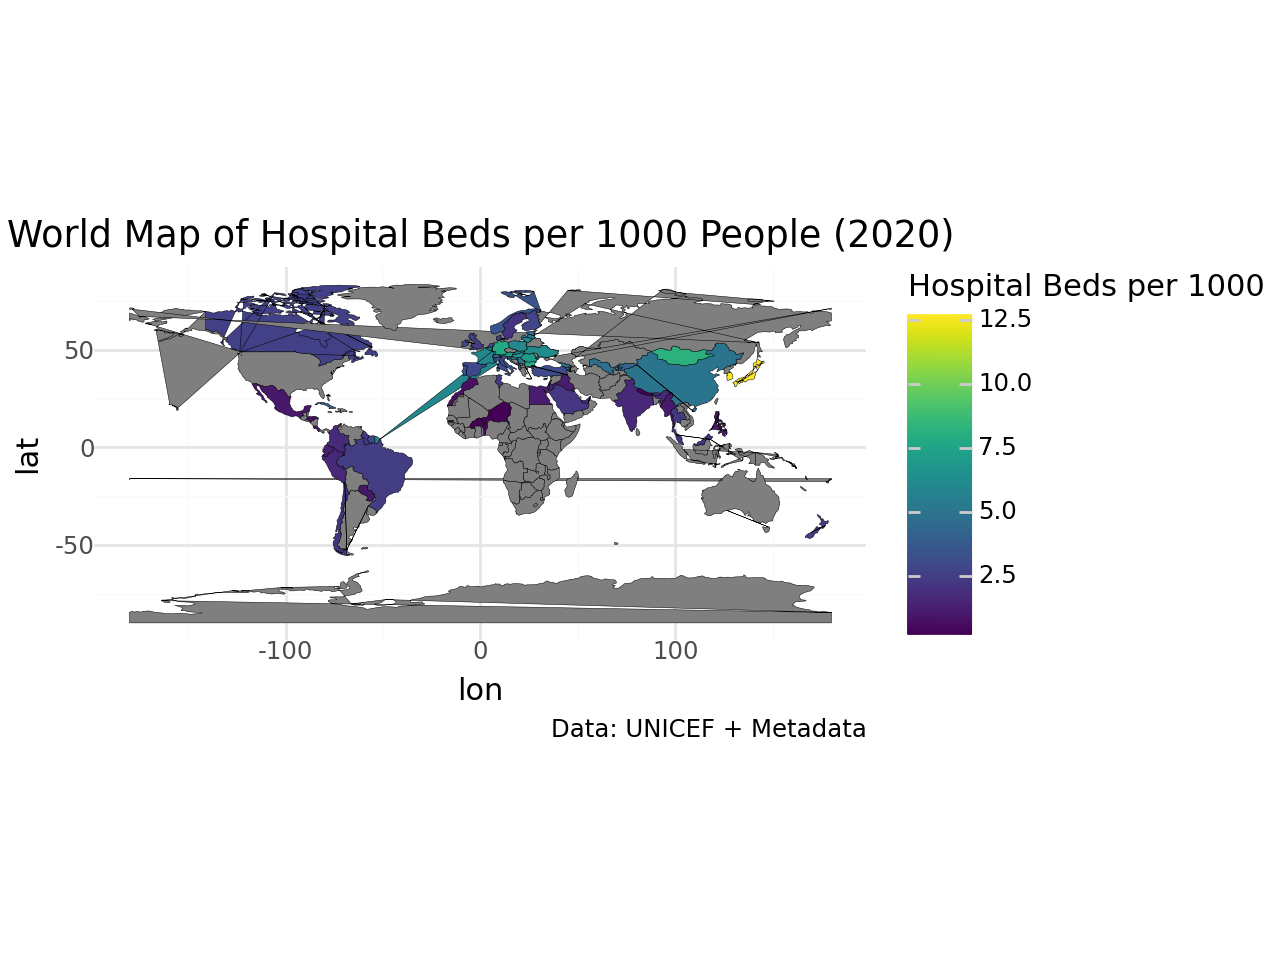

In [142]:
import pandas as pd
import geopandas as gpd
from plotnine import *
import matplotlib.pyplot as plt
from IPython.display import display

# Load the world map
world_data = gpd.read_file('https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson')

# Reproject to WGS84
world_data = world_data.to_crs(epsg=4326)

# Your cleaned merged dataframe
# merged_df = (your cleaned dataframe)

# Example: select year 2020
df_year = unicef_merged_df[unicef_merged_df['year'] == 2020]

# Merge map and data
map_df = world_data.merge(df_year, how='left', left_on='NAME', right_on='country')

# Explode multipolygons properly
map_df = map_df.explode(index_parts=False)

# Ensure geometries are valid
map_df['geometry'] = map_df['geometry'].apply(lambda x: x if x.is_valid else x.buffer(0))

# Convert to DataFrame of points
map_points = map_df.copy()
map_points['lon'] = map_points['geometry'].apply(lambda geom: geom.exterior.xy[0] if geom else None)
map_points['lat'] = map_points['geometry'].apply(lambda geom: geom.exterior.xy[1] if geom else None)

# Expand longitude and latitude
records = []
for idx, row in map_points.iterrows():
    if row['lon'] is not None:
        for lon, lat in zip(row['lon'], row['lat']):
            records.append({
                'NAME': row['NAME'],
                'hospital_beds_per_1000': row['hospital_beds_per_1000'],  # <-- changed here
                'lon': lon,
                'lat': lat
            })
plot_df = pd.DataFrame(records)

# Create the plot
plot = (
    ggplot(plot_df) +
    geom_polygon(aes(x='lon', y='lat', group='NAME', fill='hospital_beds_per_1000'), color='black', size=0.1) +
    coord_equal() +
    scale_fill_continuous(name='Hospital Beds per 1000') +  # <-- updated colorbar name
    labs(
        title='World Map of Hospital Beds per 1000 People (2020)',
        caption='Data: UNICEF + Metadata'
    ) +
    theme_minimal()
)

# Display the plot
display(plot)
plt.show()


##How is Population Growth Impacting the Economy?##

The global population has been growing at an unprecedented rate. How does this affect economic stability?

##Are Birth Rates Declining Globally?##

Many countries are experiencing declining birth rates. What does this mean for the future workforce and economic sustainability?

In [143]:
unicef_metadata['year'] = pd.to_datetime(unicef_merged_df['year'], format='%Y')
top_countries = (
    unicef_merged_df.groupby('country')['birth_rate_crude']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
df_top = unicef_merged_df[unicef_merged_df['country'].isin(top_countries)]

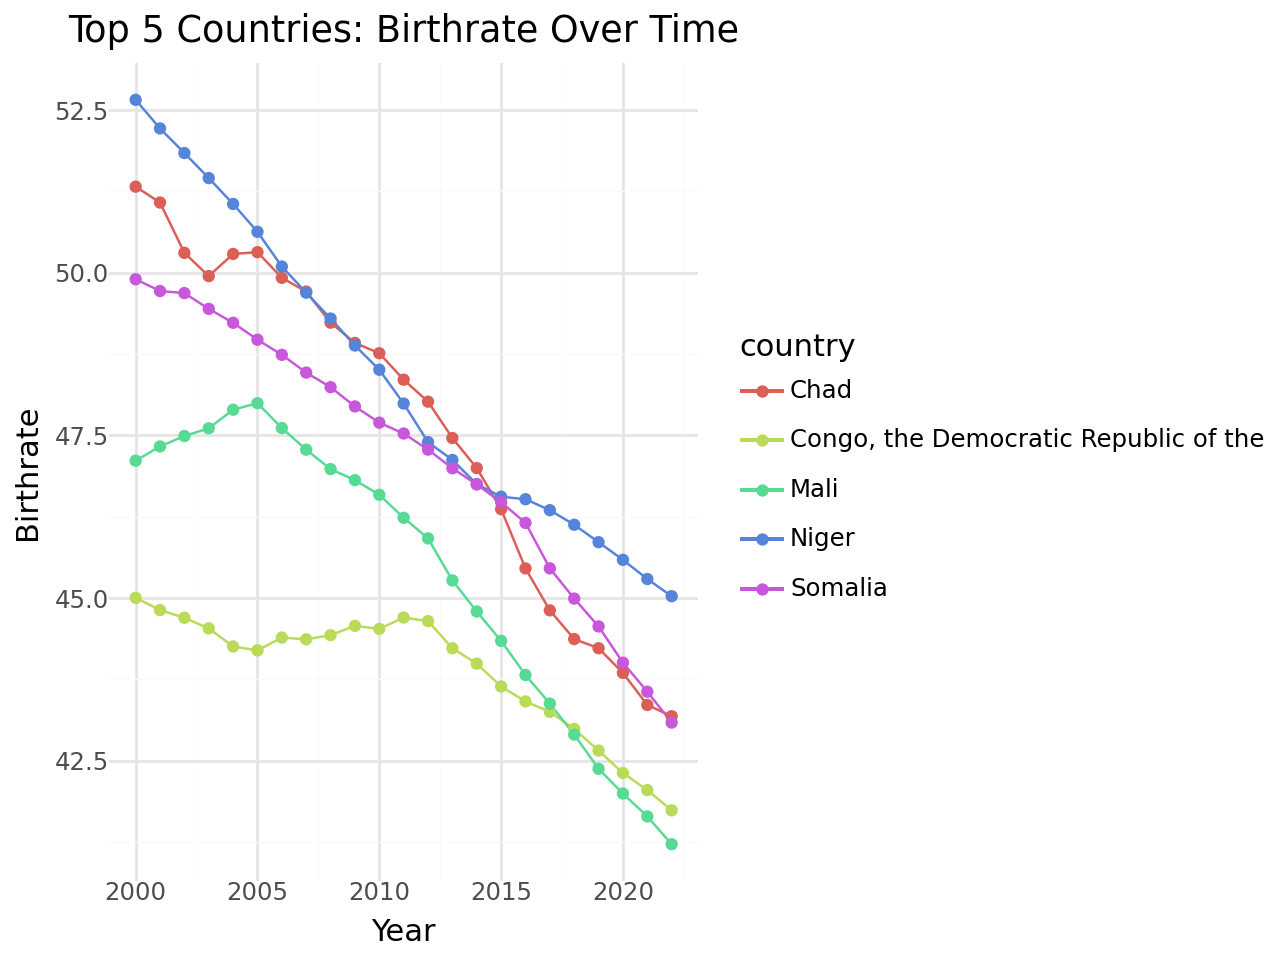

In [144]:
# Create the plot
plot = (
    ggplot(df_top, aes(x='year', y='birth_rate_crude', color='country')) +
    geom_line() +
    geom_point() +
    labs(title='Top 5 Countries: Birthrate Over Time', x='Year', y='Birthrate') +
    theme_minimal()
)

display(plot)
plt.show()

#FUTURE TRENDS#

##Uneven Economic Growth:##


-Some countries experience rapid economic growth, while others struggle with stagnation or decline.

-External factors like wars, recessions, and technological advancements influence this disparity.

##Demographic Shifts: Population & Birth Rates Are Changing the World:##


-Some nations (e.g., Japan, Germany) are seeing declining birth rates, leading to aging populations and workforce shortages.

-Others (e.g., India, Nigeria) have rising young populations, creating opportunities but also economic challenges (e.g., job creation).


/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


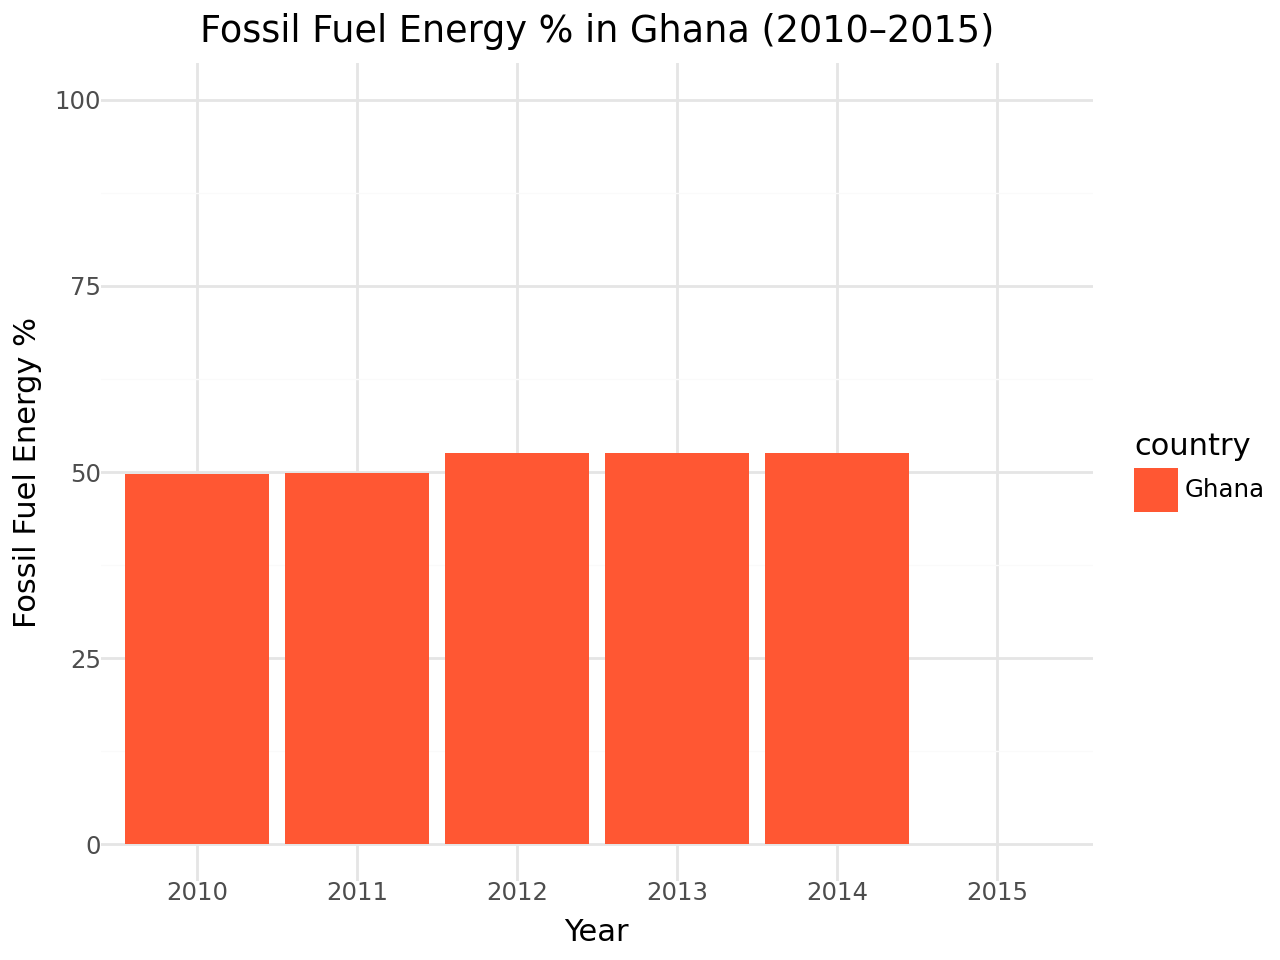

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


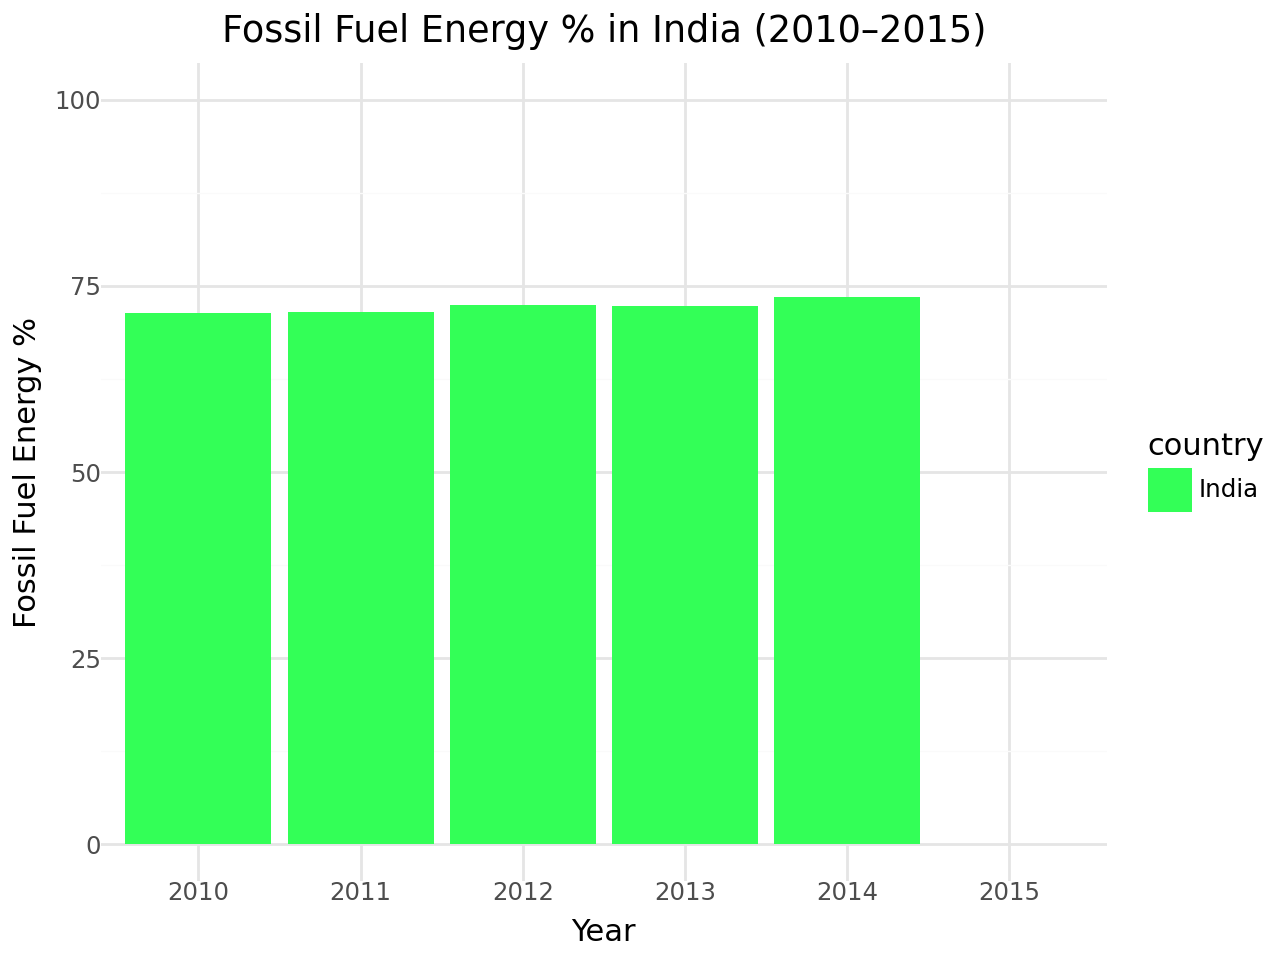

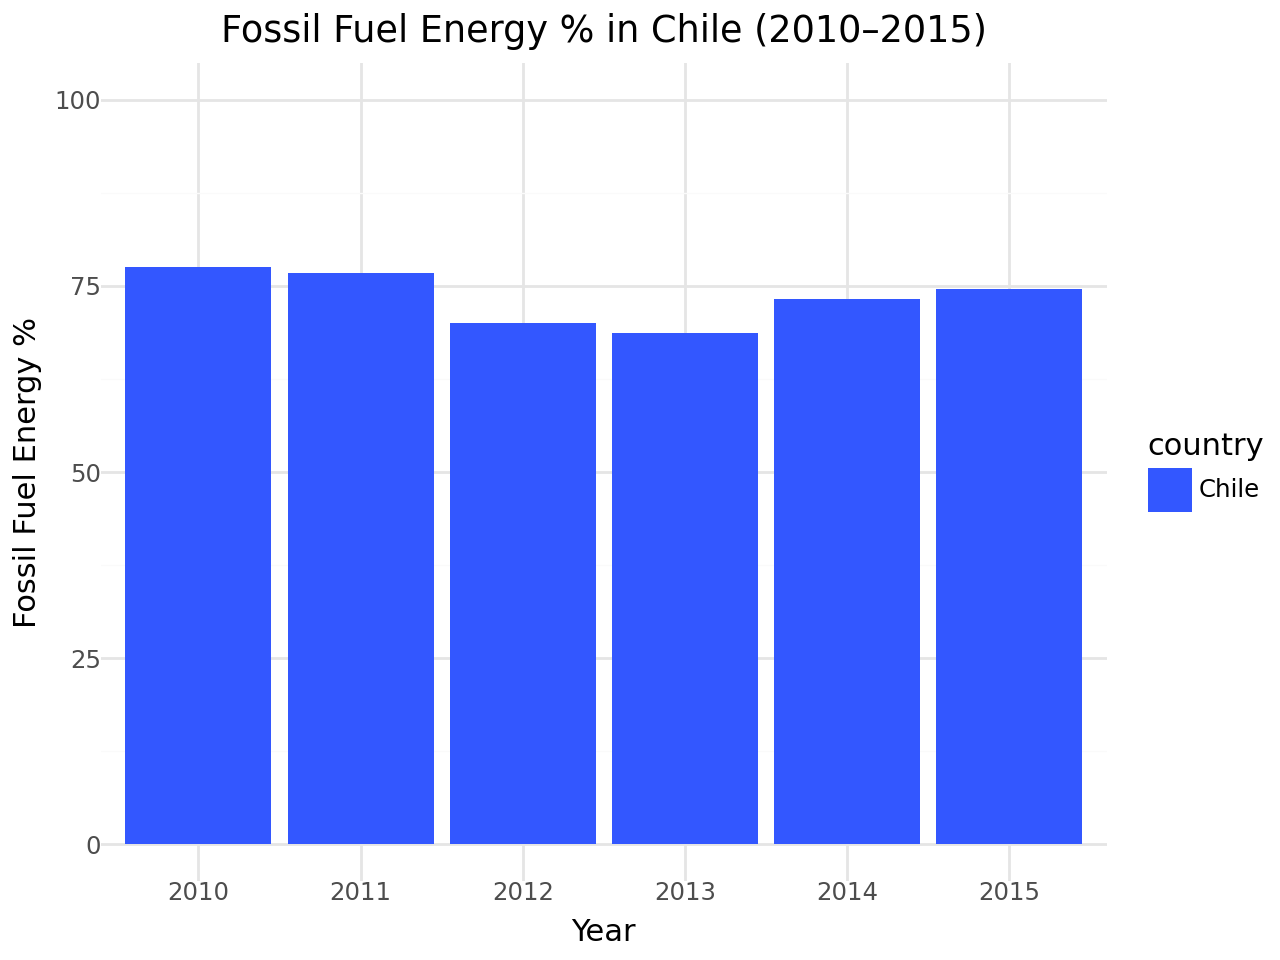

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


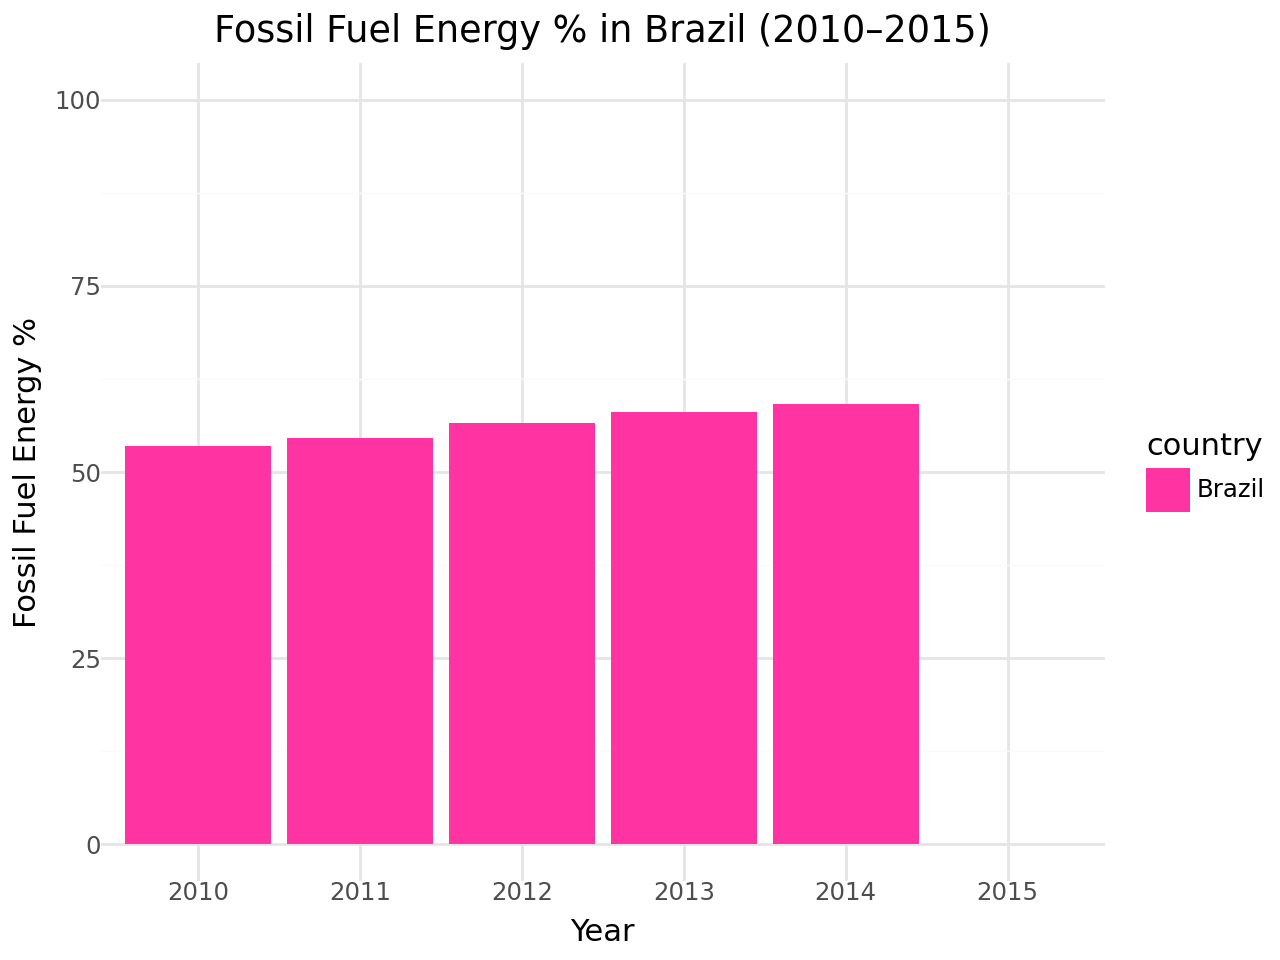

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 2 rows containing missing values.


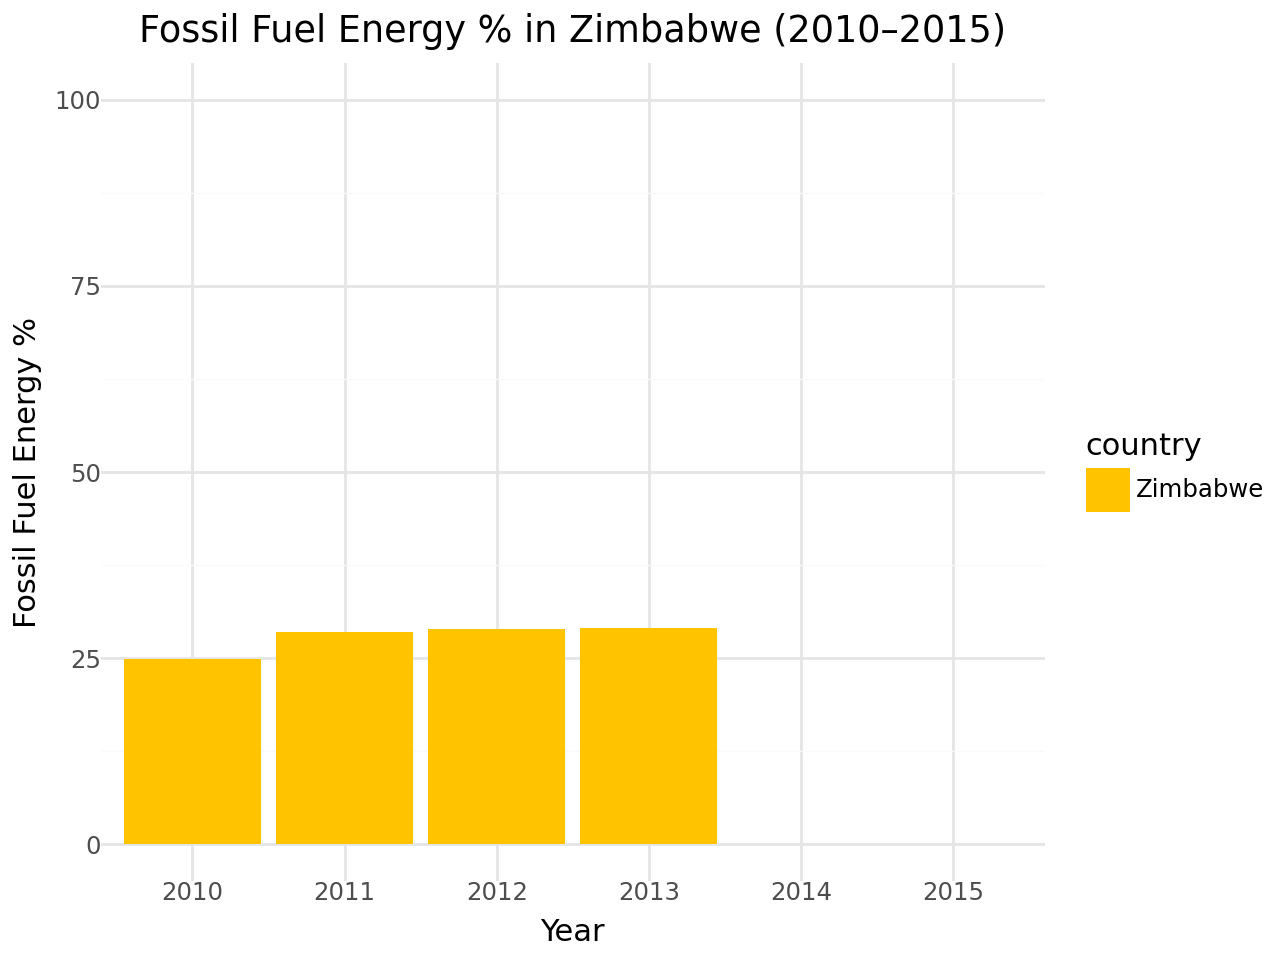

In [147]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, coord_cartesian, scale_fill_manual

# Assume your full dataframe is 'unicef_merged_df'

# Ensure 'year' is treated as a categorical variable
unicef_merged_df['year'] = unicef_merged_df['year'].astype(str)

# List of custom countries you want to create separate plots for
countries_to_plot = ['Ghana', 'India', 'Chile', 'Brazil', 'Zimbabwe']  # <-- replace with your list

# List of colors for each country
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFC300']  # You can change these colors to your preference

# Filter the main dataframe to include only those countries
custom_countries_df = unicef_merged_df[
    (unicef_merged_df['country'].isin(countries_to_plot)) &
    (unicef_merged_df['year'].astype(int) >= 2010) &
    (unicef_merged_df['year'].astype(int) <= 2015)
]

# Create separate plots for each country
for idx, country in enumerate(countries_to_plot):
    country_data = custom_countries_df[custom_countries_df['country'] == country]

    plot = (
        ggplot(country_data, aes(x='year', y='fossil_fuel_energy_pct', fill='country')) +  # fill by country
        geom_bar(stat='identity', position='dodge') +
        scale_fill_manual(values={country: colors[idx]}) +  # Assign the color for each country
        coord_cartesian(ylim=(0, 100)) +  # y-axis from 0 to 100
        labs(
            title=f'Fossil Fuel Energy % in {country} (2010–2015)',
            x='Year',
            y='Fossil Fuel Energy %'
        ) +
        theme_minimal()
    )

    display(plot)
    plt.show()
